In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [25]:
patm        = 98000     # Pascals
T_amb       = 293       # Kelvin
nR          = 5E-8   # n (moles) * R (cte gases)

A           = 2
w           = 2*pi * 1

rho_agua    = 1000      # kg/m^3
viscosidad  = 0.01      # Pa*s == kg/s
s_sup       = 7.274E-2  # N/m

In [15]:
def ps(t, w, d = 0):
    return A * sin(t*w + d)

def step_B(t, a, b):
    return -3/2 * b*b/a                         \
    + (
        3/4 * nR * T_amb / (pi*a*a*a)
        - (2*s_sup + 4*viscosidad*b)/a
        - patm #- ps(t, w)
    ) /rho_agua

# Cambio de Variables R=e^x
def step_y(t, x, y):
    return -5/2 * y*y                           \
    + exp(-2*x) * (
        (3/4 * nR * T_amb / pi) * exp(-3*x)  
        - (2*s_sup*exp(-x) + 4*viscosidad*y)   
        - patm #- ps(t, w)  
    ) / rho_agua                      

In [16]:
delta_t = 1E-8
steps   = int(1E5)

In [17]:
a, b = [5E-4], [0] # m , m/s

for step in range(1, steps):
    anew = b[step - 1]*delta_t + a[step - 1]
    bnew = step_B(step*delta_t, a[step - 1], b[step - 1])*delta_t + b[step - 1]

    a.append(anew)
    b.append(bnew)

In [18]:
x, y = [log(5E-4)], [0] # m , m/s

for step in range(1, steps):
    xnew = y[step - 1]*delta_t + x[step - 1]
    ynew = step_y(step*delta_t, x[step - 1], y[step - 1])*delta_t + y[step - 1]

    x.append(xnew)
    y.append(ynew)

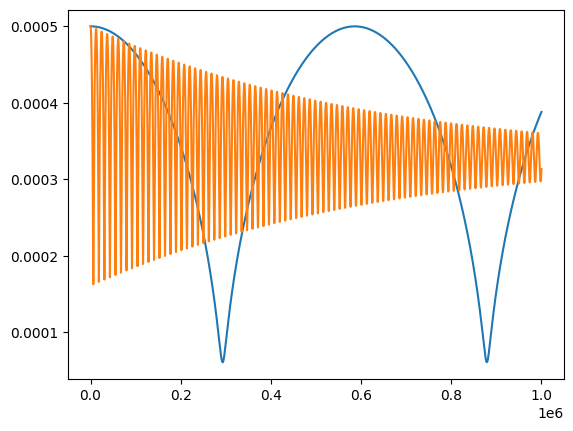

In [27]:
plt.plot(np.array(a))
plt.plot(np.exp(np.array(x)))